In [1]:
!pip install pandas numpy requests openpyxl matplotlib seaborn


In [2]:
import sqlite3


In [3]:
conn = sqlite3.connect(':memory:')  # For in-memory DB, or you can use 'financial_data.db' to store to a file

In [4]:
c = conn.cursor()


In [5]:
c.execute('''CREATE TABLE IF NOT EXISTS stocks (date TEXT, price REAL, moving_avg REAL)''')


In [6]:
c.execute('''INSERT INTO stocks (date, price, moving_avg) VALUES (?, ?, ?)''',
          ('2025-03-08', 150, 148.5))

In [7]:
conn.commit()
conn.close()

In [9]:
conn = sqlite3.connect(':memory:')


In [10]:
c = conn.cursor()


In [11]:
c.execute('SELECT * FROM stocks')


OperationalError: no such table: stocks

In [12]:
c.execute('''CREATE TABLE IF NOT EXISTS stocks (date TEXT, price REAL, moving_avg REAL)''')


In [13]:
c.execute('''INSERT INTO stocks (date, price, moving_avg) VALUES (?, ?, ?)''',
          ('2025-03-08', 150, 148.5))


In [14]:
conn.commit()


In [15]:
c.execute('SELECT * FROM stocks')


In [16]:
data = c.fetchall()


In [17]:
print(data)


[('2025-03-08', 150.0, 148.5)]


In [18]:
conn.close()


In [19]:
import pandas as pd


In [20]:
from google.colab import files


In [21]:
uploaded = files.upload()


Saving financial_data.csv to financial_data.csv


In [22]:
df = pd.read_csv('financial_data.csv')


In [23]:
print(df.head())


         Date  Stock Price   Revenue  Operating Income  Net Income  EPS  \
0  2025-03-01        150.2  50000000          10000000     8000000  2.5   
1  2025-03-02        151.1  51000000          10200000     8100000  2.6   
2  2025-03-03        152.0  52000000          10500000     8200000  2.7   
3  2025-03-04        153.5  53000000          10700000     8300000  2.8   
4  2025-03-05        154.0  54000000          10900000     8400000  2.9   

    Volume  
0  3000000  
1  3200000  
2  3100000  
3  3300000  
4  3400000  


In [28]:
# Clean and process the data

def clean_data(df):
    # Fill missing values
    df.fillna(method='ffill', inplace=True)

In [32]:
price_column = 'Stock Price'

In [33]:
if price_column not in df.columns:
        raise KeyError(f"Column '{price_column}' not found in DataFrame. Available columns: {df.columns.tolist()}")

In [35]:
df['Date'] = pd.to_datetime(df['Date'])


In [44]:
df['Price'] = pd.to_numeric(df['Stock Price'], errors='coerce')



In [48]:
def clean_data(df):
    # Fill missing values
    df.fillna(method='ffill', inplace=True)
    price_column = 'Stock Price'
    if price_column not in df.columns:
        raise KeyError(f"Column '{price_column}' not found in DataFrame. Available columns: {df.columns.tolist()}")
    df['Date'] = pd.to_datetime(df['Date'])
    df['Price'] = pd.to_numeric(df['Stock Price'], errors='coerce')
    return df  # This should be inside the function

In [49]:
data = {
    'Date': ['2025-03-01', '2025-03-02', '2025-03-03'],
    'Stock Price': [150.2, 151.1, 152.0],
    'Revenue': [50000000, 51000000, 52000000],
    'Operating Income': [10000000, 10200000, 10500000],
    'Net Income': [8000000, 8100000, 8200000],
    'EPS': [2.5, 2.6, 2.7],
    'Volume': [3000000, 3200000, 3100000]
}

In [51]:
# Convert to DataFrame
df = pd.DataFrame(data)

# Apply cleaning function
df = clean_data(df)

<ipython-input-48-87b5b0431567>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [53]:
# Apply cleaning function
df = clean_data(df)

# Calculate a moving average
df['Moving Average'] = df['Price'].rolling(window=30).mean()

# Print cleaned and processed data
print(df.head())

        Date  Stock Price   Revenue  Operating Income  Net Income  EPS  \
0 2025-03-01        150.2  50000000          10000000     8000000  2.5   
1 2025-03-02        151.1  51000000          10200000     8100000  2.6   
2 2025-03-03        152.0  52000000          10500000     8200000  2.7   

    Volume  Price  Moving Average  
0  3000000  150.2             NaN  
1  3200000  151.1             NaN  
2  3100000  152.0             NaN  


<ipython-input-48-87b5b0431567>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [54]:
# Generate an Excel file
from openpyxl import Workbook

In [55]:
# Create a workbook and sheet
wb = Workbook()
sheet = wb.active
sheet.title = 'Financial Report'

In [56]:
# Add headers
sheet.append(['Date', 'Price', 'Moving Average'])

# Add data to sheet
for index, row in df.iterrows():
    sheet.append([row['Date'], row['Price'], row['Moving Average']])

In [57]:
# Save the file
wb.save('financial_report.xlsx')

# Allow download of the Excel file
from google.colab import files
files.download('financial_report.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

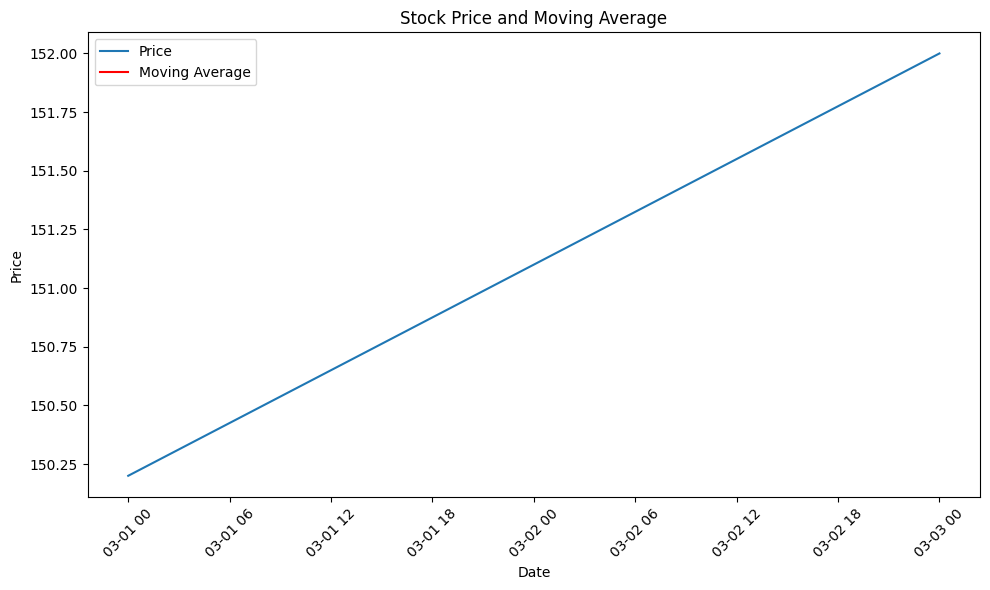

In [59]:
# Plot the stock price and moving average
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['Date'], y=df['Price'], label='Price')
sns.lineplot(x=df['Date'], y=df['Moving Average'], label='Moving Average', color='red')
plt.title('Stock Price and Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()